In [1]:
import pandas as pd

In [2]:
# Импорты
from bquant.core.logging_config import setup_logging
from bquant.data.samples import get_sample_data
from bquant.analysis.zones.pipeline import analyze_zones
setup_logging(profile='clean', exceptions={'bquant.core.nb': 'INFO'})

16:17:53 - bquant - INFO - Система логгирования BQuant инициализирована (консоль: INFO)
16:17:53 - bquant - INFO - Логи сохраняются в файл: /data/pro/bquant/logs/bquant.log (уровень: INFO)
16:17:53 - bquant.analysis.zones.detection.registry - INFO - Zone detection strategies registered: combined, line_crossing, preloaded, threshold, zero_crossing


16:17:54 - bquant.indicators.library.talib - WARNING - TA-Lib is not available
16:17:54 - bquant.indicators - INFO - External indicators registered: pandas_ta=158, talib=0
16:17:54 - bquant.indicators - WARNING - Library talib unavailable: Library not installed
16:17:55 - bquant - INFO - Система логгирования BQuant инициализирована (консоль: INFO)
16:17:55 - bquant - INFO - Логи сохраняются в файл: /data/pro/bquant/logs/bquant.log (уровень: INFO)


<Logger bquant (DEBUG)>

In [3]:
df = get_sample_data('tv_xauusd_1h').copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype                    
---  ------                     --------------  -----                    
 0   time                       1000 non-null   datetime64[ns, UTC+07:00]
 1   open                       1000 non-null   float64                  
 2   high                       1000 non-null   float64                  
 3   low                        1000 non-null   float64                  
 4   close                      1000 non-null   float64                  
 5   volume                     1000 non-null   float64                  
 6   accumulation_distribution  1000 non-null   float64                  
 7   macd                       1000 non-null   float64                  
 8   signal                     1000 non-null   float64                  
 9   rsi                        1000 non-null   float64                  
 10  r

In [5]:
df.head()

,time,open,high,low,close,volume,accumulation_distribution,macd,signal,rsi,rsi_based_ma,regular_bullish,regular_bullish_label,regular_bearish,regular_bearish_label
0,2025-06-11 20:00:00+07:00,3336.940,3344.770,3327.950,3330.000,54323.0,6.642770e+06,1.940145,2.765371,47.827521,55.231967,None,None,None,None
1,2025-06-11 21:00:00+07:00,3329.980,3341.310,3328.575,3337.635,37324.0,6.658553e+06,2.030300,2.618357,53.656385,55.138886,None,None,None,None
2,2025-06-11 22:00:00+07:00,3337.715,3342.930,3329.655,3333.220,22725.0,6.648033e+06,1.725604,2.439806,50.166113,55.035372,None,None,None,None
3,2025-06-11 23:00:00+07:00,3333.265,3334.570,3328.185,3330.390,16495.0,6.642931e+06,1.241461,2.200137,48.010293,54.292673,None,None,None,None
4,2025-06-12 00:00:00+07:00,3330.410,3331.435,3319.380,3324.365,21476.0,6.639217e+06,0.367373,1.833584,43.704225,53.189298,None,None,None,None


In [6]:
result = (
    analyze_zones(df)
    .detect_zones('zero_crossing', indicator_col='macd')
    .with_strategies(swing='zigzag', shape='statistical')
    .analyze(clustering=True, n_clusters=3)
    .build()
)

16:17:55 - bquant.core.cache.DiskCache - INFO - Disk cache initialized: /home/kogriv/.cache/bquant


In [7]:
print(len(result.zones))

29


In [8]:
result.statistics

{'total_statistics': {'total_zones': 29,
  'bull_zones_count': 15,
  'bear_zones_count': 14,
  'bull_ratio': 0.5172413793103449,
  'bear_ratio': 0.4827586206896552},
 'duration_distribution': {'overall': {'mean': 34.44827586206897,
   'median': 26.0,
   'std': 28.158462578385294,
   'min': 4.0,
   'max': 97.0,
   'q25': 11.0,
   'q75': 48.0,
   'skewness': 0.8966605436560368,
   'kurtosis': -0.23651018488035458},
  'bull': {'mean': 33.13333333333333,
   'median': 18.0,
   'std': 27.50809404693895,
   'min': 4.0,
   'max': 87.0,
   'count': 15},
  'bear': {'mean': 35.857142857142854,
   'median': 28.5,
   'std': 29.811864295063014,
   'min': 4.0,
   'max': 97.0,
   'count': 14},
  'comparison': {'t_statistic': -0.2559218832651173,
   'p_value': 0.7999509214152716,
   'significant_difference': np.False_,
   'bull_vs_bear_ratio': 0.9240371845949535}},
 'return_distribution': {'overall': {'mean': -4.606470998199931e-05,
   'median': -0.0007992407213148756,
   'std': 0.008628154234528979,
 

In [9]:
print(result.clustering is not None)

True


In [10]:
result.clustering

{'clustering_summary': {'n_clusters': 3,
  'features_used': ['duration',
   'macd_amplitude',
   'hist_amplitude',
   'price_range_pct',
   'correlation_price_hist',
   'num_peaks',
   'num_troughs'],
  'total_zones': 29,
  'clustering_quality': {'silhouette_score': 0.4266704012264994,
   'calinski_harabasz_score': 30.08520953817557,
   'davies_bouldin_score': 1.054884234614055}},
 'cluster_labels': [1,
  1,
  0,
  0,
  0,
  2,
  0,
  2,
  1,
  2,
  0,
  2,
  2,
  0,
  0,
  2,
  0,
  0,
  1,
  1,
  0,
  2,
  1,
  0,
  0,
  0,
  0,
  2,
  2],
 'clusters_analysis': {'cluster_0': {'cluster_id': 0,
   'size': 14,
   'centroid': {'duration': 11.428571428571427,
    'macd_amplitude': 2.499346571371916,
    'hist_amplitude': 2.499346571371916,
    'price_range_pct': 0.008125003769457684,
    'correlation_price_hist': 0.5331645628517244,
    'num_peaks': 1.6428571428571423,
    'num_troughs': 1.6428571428571428},
   'characteristics': {'duration_mean': 11.428571428571429,
    'duration_std': 5

In [11]:
result.statistics.keys()

dict_keys(['total_statistics', 'duration_distribution', 'return_distribution', 'macd_amplitude_distribution', 'hist_amplitude_distribution', 'additional_metrics'])

In [12]:
result.zones[0].features

{'zone_id': 0,
 'zone_type': 'bull',
 'duration': 67,
 'start_price': 3330.0,
 'end_price': 3421.085,
 'price_return': 0.027352852852852827,
 'macd_amplitude': 17.02029223768386,
 'hist_amplitude': 17.02029223768386,
 'price_range_pct': 0.03981014526809212,
 'atr_normalized_return': None,
 'correlation_price_hist': 0.6145306063825253,
 'num_peaks': 7,
 'num_troughs': 5,
 'drawdown_from_peak': -0.008819290023974968,
 'rally_from_trough': None,
 'peak_time_ratio': 0.8059701492537313,
 'trough_time_ratio': None,
 'hist_slope': 2.693923333208204,
 'metadata': {'data_points': 67,
  'start_timestamp': '0',
  'end_timestamp': '66',
  'max_price': 3451.525,
  'min_price': 3319.38,
  'price_range': 132.14499999999998,
  'oscillator_name': 'macd',
  'oscillator_max': 17.387665482527154,
  'oscillator_min': 0.3673732448432929,
  'oscillator_avg': 9.536127899854643,
  'oscillator_std': 4.555217289520141,
  'swing_calculation_mode': 'per_zone',
  'swing_metrics': {'num_swings': 2,
   'avg_rally_pct

In [13]:
print(f"Положение пика в первой зоне: {result.zones[0].features.get('peak_time_ratio')}")

Положение пика в первой зоне: 0.8059701492537313


In [14]:
if result.hypothesis_tests:
    print(result.hypothesis_tests.results)

{'tests': {'zone_duration': {'hypothesis': 'Zone duration affects price returns', 'test_type': 'Independent t-test', 'statistic': np.float64(0.6846694413513553), 'p_value': np.float64(0.5091095254924983), 'significant': np.False_, 'alpha': 0.05, 'effect_size': np.float64(0.3952940862701157), 'confidence_interval': None, 'sample_size': 12, 'metadata': {'long_zones_count': 6, 'short_zones_count': 6, 'long_zones_mean_return': np.float64(0.00542512360643882), 'short_zones_mean_return': np.float64(0.0004074228319245199), 'long_threshold': np.float64(55.20000000000004), 'short_threshold': np.float64(9.600000000000001), 'long_zones_std': np.float64(0.01760534263378706), 'short_zones_std': np.float64(0.0035080376543484863)}}, 'histogram_slope': {'hypothesis': 'Histogram slope correlates with zone duration', 'test_type': 'Pearson correlation test', 'statistic': np.float64(5.801762413187291), 'p_value': np.float64(3.5726582431252236e-06), 'significant': np.True_, 'alpha': 0.05, 'effect_size': np

In [15]:
detail = result.visualize(
    'detail',
    zone_id=result.zones[0].zone_id,
    context_bars=30,
)
detail.show()


16:17:56 - bquant.visualization.themes.ChartThemes - INFO - Chart themes initialized with 5 available themes
16:17:57 - bquant.visualization - INFO - Visualization initialized: plotly=True, matplotlib=True, charts=yes, zones=yes, statistical=yes, themes=yes
16:17:57 - bquant.visualization.themes.ChartThemes - INFO - Chart themes initialized with 5 available themes


16:18:47 - bquant.visualization.themes.ChartThemes - INFO - Chart themes initialized with 5 available themes
16:18:47 - bquant.visualization.zones.ZoneChartBuilder - WARNING - Limiting zones comparison to first 4 zones out of 29


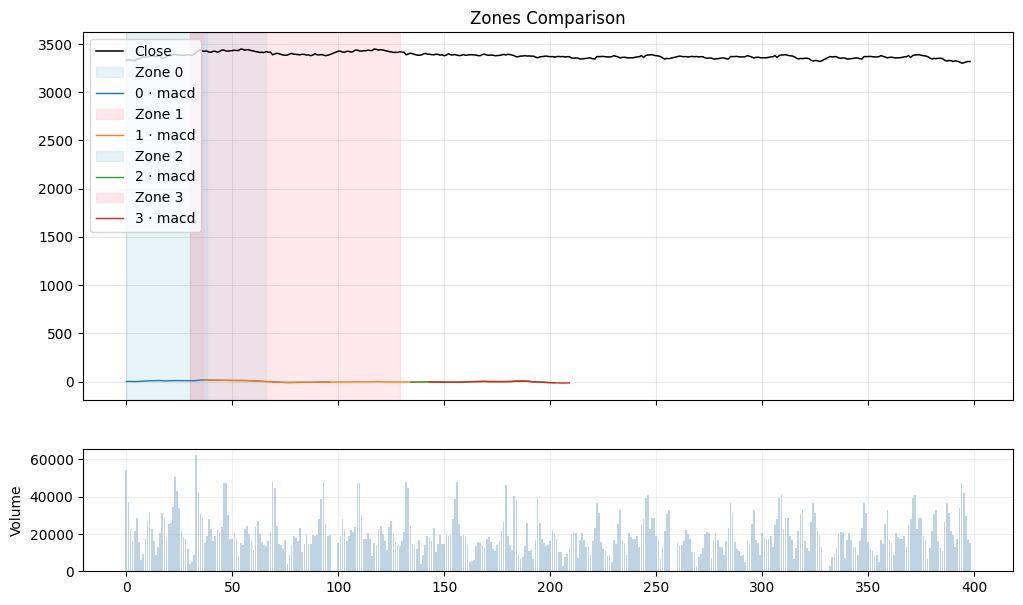

In [17]:
# Сравнение нескольких зон с выбором backend визуализатора
comparison = result.visualize(
    'comparison',
    backend='plottly',
    max_zones=4,
)
comparison.show()

In [18]:
# Быстрый обзор статистики зон
stats = result.visualize('statistics', title='Zone Statistics Summary')
stats.show()

16:19:13 - bquant.visualization.themes.ChartThemes - INFO - Chart themes initialized with 5 available themes
